<a href="https://colab.research.google.com/github/LEFT-BEE/AI_KMU/blob/main/Chapter6_summary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 지도 학습 :분류



In [ ]:
# 리스트 6-1-(1)
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# 데이터 생성 --------------------------------
np.random.seed(seed=0) # 난수를 고정
X_min = 0
X_max = 2.5
X_n = 30
X_col = ['cornflowerblue', 'gray']
X = np.zeros(X_n) # 입력 데이터
T = np.zeros(X_n, dtype=np.uint8) # 목표 데이터
Dist_s = [0.4, 0.8] # 분포의 시작 지점
Dist_w = [0.8, 1.6] # 분포의 폭
Pi = 0.5 # 클래스 0의 비율
for n in range(X_n):
    wk = np.random.rand()
    T[n] = 0 * (wk < Pi) + 1 * (wk >= Pi) # (A)
    X[n] = np.random.rand() * Dist_w[T[n]] + Dist_s[T[n]] # (B)
# 데이터 표시 --------------------------------
print('X=' + str(np.round(X, 2)))
print('T=' + str(T))

X=[1.94 1.67 0.92 1.11 1.41 1.65 2.28 0.47 1.07 2.19 2.08 1.02 0.91 1.16
 1.46 1.02 0.85 0.89 1.79 1.89 0.75 0.9  1.87 0.5  0.69 1.5  0.96 0.53
 1.21 0.6 ]
T=[1 1 0 0 1 1 1 0 0 1 1 0 0 0 1 0 0 0 1 1 0 1 1 0 0 1 1 0 1 0]


암컷이 될 확률을 pi를 0.5로 하여 무작위로 결정 
True 는 1 , False 는 0으로도 해석되므로 wk를 0~1의 난수로 정한후 
wk < pi라면 T[n] = 0*1 + 1*0 = 0 이되고 그 반대는 1이되는 구조로 
데이터 세트를 만드는 과정이다

이때 암컷이라면 Dist_s[0] = 0.4 에서 폭 Dist_w[0] = 0.8의 균일한 분포에서 질량을 샘플링하였고 수컷이라면 Dist_s[0] = 0.8 , 폭 Dist_w[0] = 1.6의 균일
한 분포에서 질량을 샘플링 한것이다.

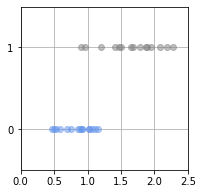

In [ ]:
# 리스트 6-1-(2)
# 데이터 분포 표시 ----------------------------
def show_data1(x, t):
    K = np.max(t) + 1
    for k in range(K): # (A)
        plt.plot(x[t == k], t[t == k], X_col[k], alpha=0.5,
                 linestyle='none', marker='o') # (B)
        plt.grid(True)
        plt.ylim(-.5, 1.5)
        plt.xlim(X_min, X_max)
        plt.yticks([0, 1])
#k = 0 , k=1의 루프안에서 t=0인 암컷의 데이터 분포와 t=1인 수컷의 데이터분포를 그려낸다

# 메인 ------------------------------------
fig = plt.figure(figsize=(3, 3))
show_data1(X, T)
plt.show()

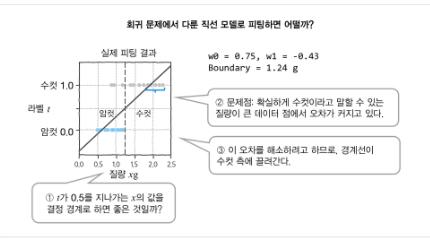


이전에 배운 선형모델로는 데이터를 정확하게 나눌 수 없다.
오른쪽에 확실하게 수컷이라고 말할 수 있는 질량이 큰 데이터점에서 오차가 커지고 있다 


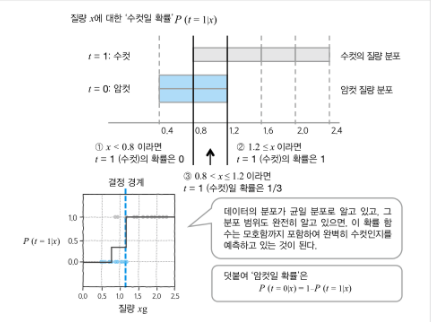

아래 수식은 확률 w에서 t=1을 생성하는 모델을 의미 한다 
이모델이 T = 0,0,0,1 이라는 데이터를 생성했다고 가정하여 이정보를 통해 타당한 w를 추정하는 문제를 만든다.


$P(T = 1 | x) = w$



즉 가능도는 아래와 같아진다 



$p(T = 0,0,0,1 | x) = (1-w)^3w$

이 그래프는 볼록 솟아있는 그래프로 T = 0,0,0,1 이 나올 최대 우도는 w = 0.25 일때이다. 단순하게 생각하면 1/4의 확률을 가질때 우리가 알고 있는 데이터 분포에 제일 비슷하게 나온다고 볼 수 있다.









위의 식은 연산하기 불편하기 떄문에 log를 취해주면 아래와 같다.

$log p = 3log(1-w) + log w$

이렇게 log를 취한 가능도는 확률세계에서의 목적함수로 사용된다 

mse 오차함수는 이를 최소화 하는 매개변수를 찾았지만 log가능도 에 경우는 최대화 하는 매개변수를 찾게 된다 .

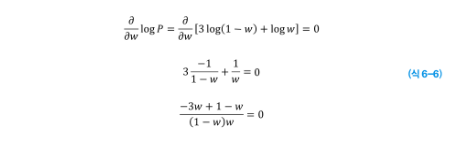

다음과 같이 가능도함수의 미분을 통해 최대값을 찾게 되고 이를 만족시키는 w는 당연하게도 0.25이다

위에서는 데이터를 균일한 분포에서 생성된 것이지만 실제 데이터가 균일하게 분포되는 경우는 거의 없다 예를들어 몸무게와 키의 차이는 가우스 함수가 잘 표현 가능하다 

조건부 확률의 로지스틱 회귀 모델은 다음과 같다 

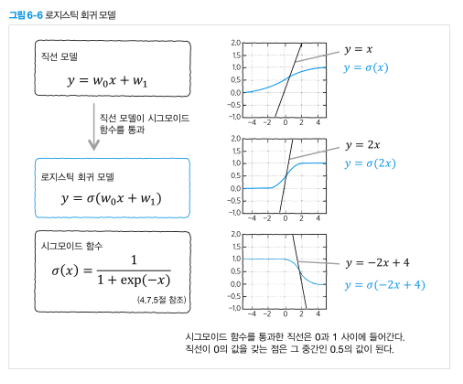




In [ ]:
# 리스트 6-1-(3)
def logistic(x, w):
    y = 1 / (1 + np.exp(-(w[0] * x + w[1])))
    return y

임의의 데이터 xb를 로지스틱 함수를 취해 0~1의 범위로 만들어준다
이때 B는 0.5를 넘어가는 y값중 최소값과 바로 그 이전값의 평균을 
경게선으로 그려준다.


1.25

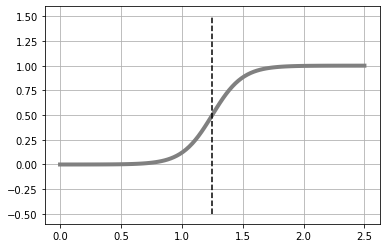

In [ ]:
# 리스트 6-1-(4)
def show_logistic(w):
    xb = np.linspace(X_min, X_max, 100)
    y = logistic(xb, w)
    plt.plot(xb, y, color='gray', linewidth=4)
    # 결정 경계
    i = np.min(np.where(y > 0.5)) # (A)
    B = (xb[i - 1] + xb[i]) / 2 # (B)
    plt.plot([B, B], [-.5, 1.5], color='k', linestyle='--')
    plt.grid(True)
    return B


# test
W = [8, -10]
show_logistic(W)

생성 확률이 t값에 의해 y나 1-y로 변해버리는 것은 좋지 않은 상황이기 때무에 아래와 같이 수식을 변환해준다.

$P(t|x) = y^t(1-y)^{t-1}$

이를 5장의 평균 제곱 오차가 최소가 되도록 매개변수를 구하고 있었으므로 그것 과 맞추기 위해 수식에 log를 취하고 -1을 곱한다 (이는 최대우도를 최대화 하는 것이 교차엔트로피를 최소화 하는 것과 같게 만드는 과정이라고도 할 수 있다.)
이를 교차 엔트로피 오차이다.

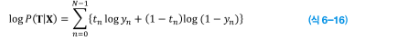





$E(w) = -(1/N)logP(T|X)$
$ = -(1/N)\sum_{n=0}^{N-1}[t_nlog(y_n) + (1-t_n)log(1-y_n)]$

따라서 오차가 최소가 되는 매개변수를 구하면 되는 것이다 그리고 교차엔트로피를 N으로 나눠 평균 교차 엔트로피 오차를 E(w)로 정의한다.(우리는 T레이블의 확률을 알 수없기에 레이블의 평균값으로 이를 대체한다)

이렇게 하는 이유는 데이터 개수에 오차 값이 영향을 받지 않게 하고 수치를 확인하기에 편하기 때문이다.

In [ ]:
# 리스트 6-1-(5)
# 평균 교차 엔트로피 오차 ---------------------
def cee_logistic(w, x, t):
    y = logistic(x, w)
    cee = 0
    for n in range(len(y)):
        cee = cee - (t[n] * np.log(y[n]) + (1 - t[n]) * np.log(1 - y[n]))
    cee = cee / X_n
    return cee


# test
W=[1,1]
cee_logistic(W, X, T)

1.0288191541851066

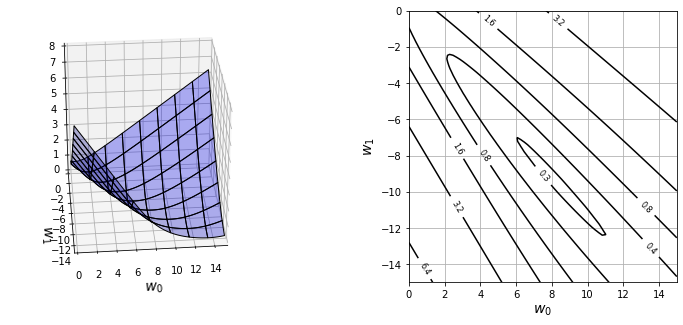

In [ ]:
# 리스트 6-1-(6)
from mpl_toolkits.mplot3d import Axes3D


# 계산 --------------------------------------
xn = 80 # 등고선 표시 해상도
w_range = np.array([[0, 15], [-15, 0]])
x0 = np.linspace(w_range[0, 0], w_range[0, 1], xn)
x1 = np.linspace(w_range[1, 0], w_range[1, 1], xn)
xx0, xx1 = np.meshgrid(x0, x1)
C = np.zeros((len(x1), len(x0)))
w = np.zeros(2)
for i0 in range(xn):
    for i1 in range(xn):
        w[0] = x0[i0]
        w[1] = x1[i1]
        C[i1, i0] = cee_logistic(w, X, T)


# 표시 --------------------------------------
plt.figure(figsize=(12, 5))
#plt.figure(figsize=(9.5, 4))
plt.subplots_adjust(wspace=0.5)
ax = plt.subplot(1, 2, 1, projection='3d')
ax.plot_surface(xx0, xx1, C, color='blue', edgecolor='black',
                rstride=10, cstride=10, alpha=0.3)
ax.set_xlabel('$w_0$', fontsize=14)
ax.set_ylabel('$w_1$', fontsize=14)
ax.set_xlim(0, 15)
ax.set_ylim(-15, 0)
ax.set_zlim(0, 8)
ax.view_init(30, -95)


plt.subplot(1, 2, 2)
cont = plt.contour(xx0, xx1, C, 20, colors='black',
                   levels=[0.26, 0.4, 0.8, 1.6, 3.2, 6.4])
cont.clabel(fmt='%1.1f', fontsize=8)
plt.xlabel('$w_0$', fontsize=14)
plt.ylabel('$w_1$', fontsize=14)
plt.grid(True)
plt.show()

오차함수의 극소값을 찾기 위해서는 편미분을 해야한다 크로스 엔트로피의 오차함수는 다음과 같이 전개된다.

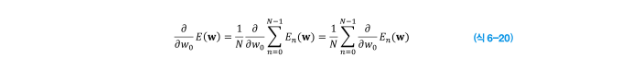


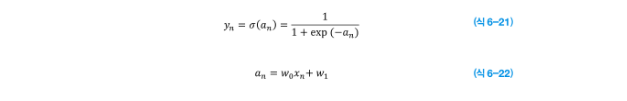


이렇게 정의한다면 $E_n(w) = E_n(y_n(a_n(w)))$ 와 같이 해석할 수 있으므로 w_0로 편미분하기 위해 연쇄법칙의 공식을 하용한다.

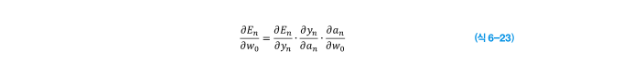



이는 계산에 의해 아래와 같은 식이 도출된다

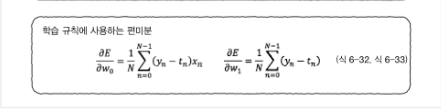

In [ ]:
# 리스트 6-1-(7)
# 평균 교차 엔트로피 오차의 미분 --------------
def dcee_logistic(w, x, t):
    y = logistic(x, w)
    dcee = np.zeros(2)
    for n in range(len(y)):
        dcee[0] = dcee[0] + (y[n] - t[n]) * x[n] #w_0 의 편미분값
        dcee[1] = dcee[1] + (y[n] - t[n]) #w_1의 편미분 값
    dcee = dcee / X_n
    return dcee


# --- test
W=[1, 1]
dcee_logistic(W, X, T)

array([0.30857905, 0.39485474])

경사 하강법으로 로지스틱 회귀 모델의 매개변수를 찾는 코드이다 여기에서는 scipy.optimzier 라이브러리에 포함된 minimzie() 함수로 경사하강법을 시도한다 

In [ ]:
# 리스트 6-1-(8)
from scipy.optimize import minimize


# 매개 변수 검색
def fit_logistic(w_init, x, t):
    res1 = minimize(cee_logistic, w_init, args=(x, t),
                    jac=dcee_logistic, method="CG") # (A)
    return res1.x

    #minize 함수의 괄호안의 앞에서 부터 목적함수와 초기값 , cee_logistic의 w이외의 인수
    # , 미분 함수를 지정 , 사용할 알고리즘을 나타내는 문자열 - 켤레 기울기 법이라는 경사하강법지정

w0 = 8.18, w1 = -9.38
CEE = 0.25
Boundary = 1.15 g


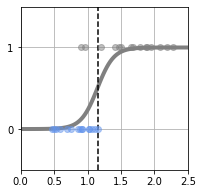

In [ ]:
# 메인 ------------------------------------
plt.figure(1, figsize=(3, 3))
W_init=[1,-1]
W = fit_logistic(W_init, X, T)
print("w0 = {0:.2f}, w1 = {1:.2f}".format(W[0], W[1]))
B=show_logistic(W)
show_data1(X, T)
plt.ylim(-.5, 1.5)
plt.xlim(X_min, X_max)

cee = cee_logistic(W, X, T)
print("CEE = {0:.2f}".format(cee))
print("Boundary = {0:.2f} g".format(B))
plt.show()

결정 경계는 1.15가 되고 직선 모델을 mse로 피팅 했을때의 결계결정(1.24)보다 약간 왼쪽으로 치우침

다시 강조하는 내용은 이 모델의 출력값이 p=(t=1|x)라는 조건부 확률을 근사하려는 점이며 모호성을 포함해 예측하는 것이다.

In [ ]:
%reset #데이터 재설정

Once deleted, variables cannot be recovered. Proceed (y/[n])? y
Don't know how to reset  #데이터, please run `%reset?` for details
Don't know how to reset  재설정, please run `%reset?` for details


In [ ]:
# 리스트 6-2-(1)
#2클래스 분류와 3클래스의 분류데이터를 함께 만든다.
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


# 데이터 생성 --------------------------------
np.random.seed(seed=1)  # 난수를 고정
N = 100 # 데이터의 수
K = 3 # 분포 수
T3 = np.zeros((N, 3), dtype=np.uint8)
T2 = np.zeros((N, 2), dtype=np.uint8)
X = np.zeros((N, 2))
X_range0 = [-3, 3] # X0 범위 표시 용
X_range1 = [-3, 3] # X1의 범위 표시 용
Mu = np.array([[-.5, -.5], [.5, 1.0], [1, -.5]]) # 분포의 중심
Sig = np.array([[.7, .7], [.8, .3], [.3, .8]]) # 분포의 분산
Pi = np.array([0.4, 0.8, 1]) # (A) 각 분포에 대한 비율 0.4 0.8 1

In [ ]:
for n in range(N):
    wk = np.random.rand()
    for k in range(K): # (B)
        if wk < Pi[k]:
            T3[n, k] = 1
            break
    for k in range(2):
        X[n, k] = (np.random.randn() * Sig[T3[n, :] == 1, k]
                   + Mu[T3[n, :] == 1, k])
        #각 레이블에 맞는 Sig 와 Mu를 가진다.
T2[:, 0] = T3[:, 0]
T2[:, 1] = T3[:, 1] | T3[:, 2]

In [ ]:
# 리스트 6-2-(2)
print(X[:5,:])

[[-0.14173827  0.86533666]
 [-0.86972023 -1.25107804]
 [-2.15442802  0.29474174]
 [ 0.75523128  0.92518889]
 [-1.10193462  0.74082534]]


클래스 데이터 T2의 처음 5개는 아래와 같고 이는
위에서부터 클래스 1,0,0,1,0에 속한다는 의미이다 1인 열 번호가 클래스 번호를 나타낸다. 마찬가지로 T3의 데이터도 1인 열번호가 클래스 이므로 T2와 데이터 분포가 같다

이처럼 목적변수 벡터 t_n 의 K번째 요소만 1로 그외에는 0으로 표기하는 방법을 1-OF-K 부호화 라고 한다


In [ ]:
# 리스트 6-2-(3)
print(T2[:10,:])

[[0 1]
 [1 0]
 [1 0]
 [0 1]
 [1 0]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [1 0]]


In [ ]:
# 리스트 6-2-(4)
print(T3[:10,:])

[[0 1 0]
 [1 0 0]
 [1 0 0]
 [0 1 0]
 [1 0 0]
 [0 1 0]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [1 0 0]]


어떤 클래스에 소속하는 확률을 PI= np.array([0.4 , 0.8 , 1])로 설정하였다. 

0~1 사이의 균일한 부포에서 난수를 생성하여 wk에 넣고 그것이 PI[0]보다 작을 경우 클래스 0 , PI[1]보다 작으면 클래스 1 , PI[2]보다 작으면 2로 구현하였다.

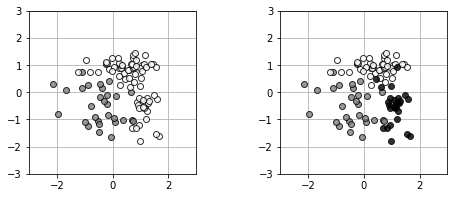

In [ ]:
# 리스트 6-2-(5)
# 데이터 표시 --------------------------
#x 는 데이터 t는 레이블을 의미한다.
def show_data2(x, t):
    wk, K = t.shape
    c = [[.5, .5, .5], [1, 1, 1], [0, 0, 0]]# rgb
    for k in range(K):
        plt.plot(x[t[:, k] == 1, 0], x[t[:, k] == 1, 1],
                 linestyle='none', markeredgecolor='black',
                 marker='o', color=c[k], alpha=0.8)
        plt.grid(True)


# 메인 ------------------------------
plt.figure(figsize=(7.5, 3))
plt.subplots_adjust(wspace=0.5)
plt.subplot(1, 2, 1)
show_data2(X, T2)
plt.xlim(X_range0)
plt.ylim(X_range1)


plt.subplot(1, 2, 2)
show_data2(X, T3)
plt.xlim(X_range0)
plt.ylim(X_range1)
plt.show()

로지스틱 회귀 모델은 1차원 입력버전에서 간단하게 2차원 입력 버전으로 확장가능 

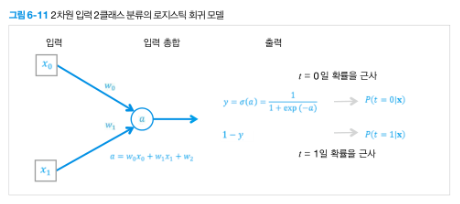

모델의 매개 변수가 하나증가하여  w_0 , w_1 ,w_2의 세가지이다.


In [ ]:
# 리스트 6-2-(6)
# 로지스틱 회귀 모델 -----------------
#로지스틱휘귀 모델의 손실함수도 크로스 엔트로피의 일종 (바이너리)
def logistic2(x0, x1, w):
    y = 1 / (1 + np.exp(-(w[0] * x0 + w[1] * x1 + w[2])))
    return y

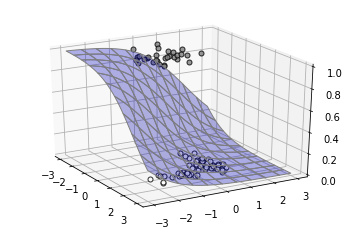

In [ ]:
# 리스트 6-2-(7)
# 모델 3D보기 ------------------------------
from mpl_toolkits.mplot3d import axes3d


def show3d_logistic2(ax, w):
    xn = 50
    x0 = np.linspace(X_range0[0], X_range0[1], xn)
    x1 = np.linspace(X_range1[0], X_range1[1], xn)
    xx0, xx1 = np.meshgrid(x0, x1)
    y = logistic2(xx0, xx1, w)
    ax.plot_surface(xx0, xx1, y, color='blue', edgecolor='gray',
                    rstride=5, cstride=5, alpha=0.3)


def show_data2_3d(ax, x, t):
    c = [[.5, .5, .5], [1, 1, 1]]
    for i in range(2):
        ax.plot(x[t[:, i] == 1, 0], x[t[:, i] == 1, 1], 1 - i,
                marker='o', color=c[i], markeredgecolor='black',
                linestyle='none', markersize=5, alpha=0.8)
    Ax.view_init(elev=25, azim=-30)


# test ---
Ax = plt.subplot(1, 1, 1, projection='3d')
W=[-1, -1, -1]
show3d_logistic2(Ax, W)
show_data2_3d(Ax,X,T2)

모델의 등고선 표시도로 만든다 실행하게 되면 w=[-1,-1,-1] 을 선택한 경우의 로지스틱 회귀모델의 출력이 등고선으로 표시된다.


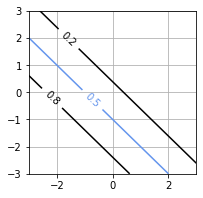

In [ ]:
# 리스트 6-2-(8)
# 모델 등고선 2D 표시 ------------------------


def show_contour_logistic2(w):
    xn = 30 # 파라미터의 분할 수
    x0 = np.linspace(X_range0[0], X_range0[1], xn)
    x1 = np.linspace(X_range1[0], X_range1[1], xn)
    xx0, xx1 = np.meshgrid(x0, x1)
    y = logistic2(xx0, xx1, w)
    cont = plt.contour(xx0, xx1, y, levels=(0.2, 0.5, 0.8),
                       colors=['k', 'cornflowerblue', 'k'])
    cont.clabel(fmt='%1.1f', fontsize=10)
    plt.grid(True)


# test ---
plt.figure(figsize=(3,3))
W=[-1, -1, -1]
show_contour_logistic2(W)

모델의 평균 엔트로피 오차함수는 아래와 같다.

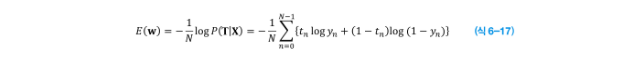




여기서 1-of-k 부호화를 사용하는데 2클래스 분류문제이므로 T의 0열째 t_n0을 t_n으로 두고 1이면 클래스 0 그리고 0이면 클래스 1로
오차를 계산한다.

In [ ]:
# 리스트 6-2-(9)
# 크로스 엔트로피 오차 ------------
def cee_logistic2(w, x, t):
    X_n = x.shape[0]
    y = logistic2(x[:, 0], x[:, 1], w)
    cee = 0
    for n in range(len(y)):
        cee = cee - (t[n, 0] * np.log(y[n]) +
                     (1 - t[n, 0]) * np.log(1 - y[n]))
    cee = cee / X_n
    return cee

미분에 관한 내용은 4장에서 다루었으므로 생략하겠습니다.

In [ ]:
# 리스트 6-2-(10)
# 크로스 엔트로피 오차의 미분 ------------
def dcee_logistic2(w, x, t):
    X_n=x.shape[0]
    y = logistic2(x[:, 0], x[:, 1], w)
    dcee = np.zeros(3)
    for n in range(len(y)):
        dcee[0] = dcee[0] + (y[n] - t[n, 0]) * x[n, 0]
        dcee[1] = dcee[1] + (y[n] - t[n, 0]) * x[n, 1]
        dcee[2] = dcee[2] + (y[n] - t[n, 0])
    dcee = dcee / X_n
    return dcee


# test ---
W=[-1, -1, -1]
dcee_logistic2(W, X, T2)

array([ 0.10272008,  0.04450983, -0.06307245])

앞에서와 같이 minimize()를 통해 미분함수를 전달 하여 켤레 기울기 법으로 매개 변수를 구하고 그 결과를 출력한 것이다.

사용한 로지스틱 회귀 모델의 시그모이드 함수의 내용은 면 모델이고 이면은 시그모이드 함수에 의 해 0~1사이에 분포한다.

그리고 학습을 통해 형성된 경계가 파란색 직선으로 시각화 되있다.

w0 = -3.70, w1 = -2.54, w2 = -0.28
CEE = 0.22


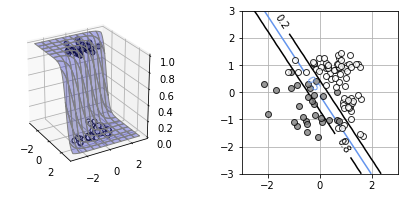

In [ ]:
# 리스트 6-2-(11)
from scipy.optimize import minimize


# 로지스틱 회귀 모델의 매개 변수 검색 -
def fit_logistic2(w_init, x, t):
    res = minimize(cee_logistic2, w_init, args=(x, t),
                   jac=dcee_logistic2, method="CG")
    return res.x


# 메인 ------------------------------------
plt.figure(1, figsize=(7, 3))
plt.subplots_adjust(wspace=0.5)


Ax = plt.subplot(1, 2, 1, projection='3d')
W_init = [-1, 0, 0]
W = fit_logistic2(W_init, X, T2)
print("w0 = {0:.2f}, w1 = {1:.2f}, w2 = {2:.2f}".format(W[0], W[1], W[2]))
show3d_logistic2(Ax, W)


show_data2_3d(Ax, X, T2)
cee = cee_logistic2(W, X, T2)
print("CEE = {0:.2f}".format(cee))


Ax = plt.subplot(1, 2, 2)
show_data2(X, T2)
show_contour_logistic2(W)
plt.show()

이번에는 소프트맥스 함수를 모델의 출력에 사용하는 것으로 3클래스 이상의 클래스 분류에 대응 가능하다 

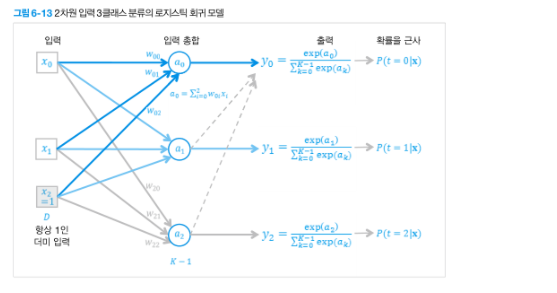



3클래스의 분류문제이기에 3개의클래스에 대응하는 수식을 결정한다 

$a_k = w_{k0}x_0 + w_{k1}x_1 + w_{k2}  (k= 0,1,2)$ 

2차원 input을 가지지만 항상 1의 값을 갖는 세번째 입력 x2 = 1를 가정하여 아래와 같이 표현한다.

$a_k = w_{k0}x_0 + w_{k1}x_1 + w_{k2}x_2 $

$ = \sum^{D}_{i=0} w_{ki}x_i $

이렇게 구현된 입력 총합을 소프트 맥스 함수에 입력한다 

$ u = \sum^{K-1}_{k=0} \exp(a_k) $

따라서 각 클래스로 분류될 확률을 다음과 같이 나타낸다 y의 총합은 확률의 총합이므로 항상 1이 보장된다. 

$y_k  = \frac{\exp(a_k)}{u}$




모델의 매개변수를 행렬로 나타내면 아래와 같고 모델의 출력이 각 클래에 입력 x가 속할 확률을 나타내도록 학습 시키므로 3클래스용 로지스틱 회귀 모델은 다음과 같이 구현된다.

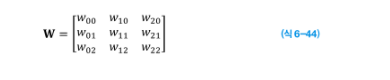

In [ ]:
# 리스트 6-2-(12)
# 3 클래스 용 로지스틱 회귀 모델 -----------------


def logistic3(x0, x1, w):
    K = 3
    w = w.reshape((3, 3))
    n = len(x1)
    y = np.zeros((n, K))
    for k in range(K):
        y[:, k] = np.exp(w[k, 0] * x0 + w[k, 1] * x1 + w[k, 2])

    wk = np.sum(y, axis=1)
    wk = y.T / wk
    y = wk.T
    return y

In [ ]:
# test ---
W = np.array([1, 2, 3, 4 ,5, 6, 7, 8, 9])
y = logistic3(X[:3, 0], X[:3, 1], W)
print(np.round(y, 3))

[[0.    0.006 0.994]
 [0.965 0.033 0.001]
 [0.925 0.07  0.005]]


모델의 학습해야할 매개변수 W의 요소수는 9개이다 minimize에 대응 하기위해 입력 W는 3x3행렬을 늘어놓은 요소 수 9개의 벡터로 취급한다. 

출력은 N x 3의 행렬로 표현한 y로 같은 라인의 요소를 더하면 1이 된다.

## 교차 엔트로피 오차 

가능도는 모든 입력 데이터 X에 대해서 전체 클래스 데이터 T가 생성된 확률이다.

클래스에 대하여 수식을 일반화 하면 아래와 같다.

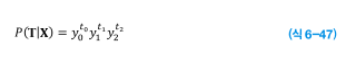




모든 N개의 데이터가 생성된 확률은 , 이 확률을 모든 데이터에 곱하면 되며 다음과 같다.

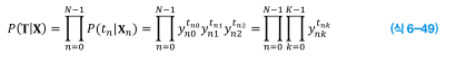

평균 교차 엔트로피 오차 함수는 가능도의 음의 평균이므로 다음과 같다.

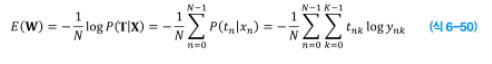



In [ ]:
# 리스트 6-2-(13)
# 교차 엔트로피 오차 ------------
def cee_logistic3(w, x, t):
    X_n = x.shape[0]
    y = logistic3(x[:, 0], x[:, 1], w)
    cee = 0
    N, K = y.shape
    for n in range(N):
        for k in range(K):
            cee = cee - (t[n, k] * np.log(y[n, k]))
    cee = cee / X_n
    return cee


# test ----
W = np.array([1, 2, 3, 4 ,5, 6, 7, 8, 9])
cee_logistic3(W, X, T3)



경사 하강법으로 E(W)를 최소화 하는 W를 구하려면 E(W)의 각 w_ki에 관한 편미분이 필요하므로 다음과 같다.

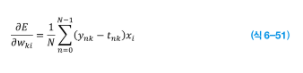



아래 코드의 출력은 각 배열 요소에 대응한 미분값이다.

In [ ]:
# 리스트 6-2-(14)
# 교차 엔트로피 오차의 미분 ------------
#미분의 결과 만을 다루고 자세한 과정은 7장에서 나오게된다.
def dcee_logistic3(w, x, t):
    X_n = x.shape[0]
    y = logistic3(x[:, 0], x[:, 1], w)
    dcee = np.zeros((3, 3)) # (클래스의 수 K) x (x의 차원 D+1)
    N, K = y.shape
    for n in range(N):
        for k in range(K):
            dcee[k, :] = dcee[k, :] - (t[n, k] - y[n, k])* np.r_[x[n, :], 1]
    dcee = dcee / X_n
    return dcee.reshape(-1)


# test ----
W = np.array([1, 2, 3, 4 ,5, 6, 7, 8, 9])
dcee_logistic3(W, X, T3)

미분값을 minimize()에 전달하여 매개 변수 검색을 수행하는 함수를 만든다.

In [ ]:
# 리스트 6-2-(15)
# 매개 변수 검색 -----------------
def fit_logistic3(w_init, x, t):
    res = minimize(cee_logistic3, w_init, args=(x, t),
                   jac=dcee_logistic3, method="CG")
    return res.x

아래 코드는 가중치 매개변수 w를 전달하면 표시할 입력 공간을 30 x 30으로 분할하여 모든 입력에 대해 네트워크의 출력을 확인한다.

그리고 각각의 카테고리에서 0.5 또는 0.9이상의 출력을 얻을 수 영역을 등고선으로 표시한다.

In [ ]:
# 리스트 6-2-(16)
# 모델 등고선 2D 표시 --------------------
def show_contour_logistic3(w):
    xn = 30 # 파라미터의 분할 수
    x0 = np.linspace(X_range0[0], X_range0[1], xn)
    x1 = np.linspace(X_range1[0], X_range1[1], xn)


    xx0, xx1 = np.meshgrid(x0, x1)
    y = np.zeros((xn, xn, 3))
    for i in range(xn):
        wk = logistic3(xx0[:, i], xx1[:, i], w)
        for j in range(3):
            y[:, i, j] = wk[:, j]
    for j in range(3):
        cont = plt.contour(xx0, xx1, y[:, :, j],
                           levels=(0.5, 0.9),
                           colors=['cornflowerblue', 'k'])
        cont.clabel(fmt='%1.1f', fontsize=9)
    plt.grid(True)

In [ ]:
# 리스트 6-2-(17)
# 메인 ------------------------------------
W_init = np.zeros((3, 3))
W = fit_logistic3(W_init, X, T3)
print(np.round(W.reshape((3, 3)),2))
cee = cee_logistic3(W, X, T3)
print("CEE = {0:.2f}".format(cee))


plt.figure(figsize=(3, 3))
show_data2(X, T3)
show_contour_logistic3(W)
plt.show()

NameError: ignored

결과는 아래와 같다 클래스 사이의 경계값이 그어져 있다. 이러한 다변수 클래스 로지스틱 회귀 모델에서는 클래스 간 경계선이 직선의 조합으로 구성된다 

이 모델의 의의는 모호성을 조건부 확률(시후 확률)로 근사하는 것에 있다.

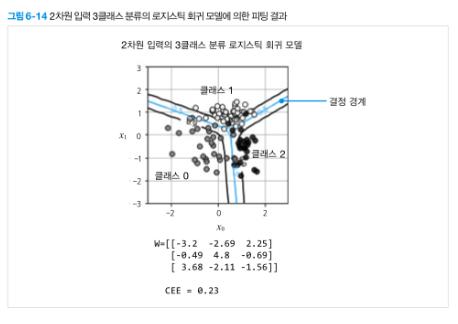